In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# generate a 2-class classification problem with 2,000 data points, each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=2000, n_features=2, centers=2, cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))

'''insert a column of 1’s as the last entry in the feature matrix  
--> treat the bias as a trainable parameter'''
X = np.c_[X, np.ones((X.shape[0]))]

# Split data, use 50% of the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)

In [3]:
def sigmoid_activation(x):
    """compute the sigmoid activation value for a given input"""
    """Sigmoid funcion S(x) = \frac{1}{1+exp(x)}"""
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_deriv(x):
    '''compute the derivative of the sigmoid function ASSUMING
    that the input ‘x‘ has already been passed through the sigmoid
    activation function'''
    return x * (1 - x)

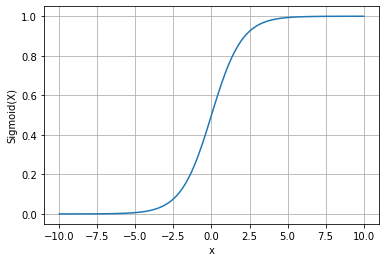

In [4]:
plt.plot(np.linspace(-10, 10, 100), sigmoid_activation(np.linspace(-10, 10, 100)))
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid(True)
plt.show()

In [5]:
def compute_h(W, X):
    """
    Compute output: Take the dot product between our features ‘X‘ and the weight
    matrix ‘W‘, then pass this value through our sigmoid activation function 
    """
    return sigmoid_activation(np.dot(X, W))

def predict(W, X):
    '''Take the dot product between our features and weight matrix, 
       then pass this value through our sigmoid activation'''
    preds = compute_h(W, X)
    
    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1

    return preds

In [6]:
# batch gradient descent
W = np.random.randn(X.shape[1], 1)
losses = []

In [7]:
def compute_gradient(error, h, trainX):
    """
    The gradient descent update is the dot product between our
    features and the error of the sigmoid derivative of our predictions
    """
    gradient = np.dot(trainX.T, error * sigmoid_deriv(h))
    return gradient

In [8]:
def train(W, X_trains, y_trains, learning_rate, num_epochs):
    for epoch in np.arange(0, num_epochs):
        h = compute_h(W, X_trains)
        # now that we have our predictions, we need to determine the
        # ‘error‘, which is the difference between our predictions and
        # the true values
        error = h - y_trains

        loss = np.sum(error ** 2)
        losses.append(loss)

        gradient = compute_gradient(error, h, X_trains)
        
        W += -learning_rate * gradient
        
        if epoch == 0 or (epoch + 1) % 5 == 0:
            print("[LOG] Epoch={}, loss={:.7f}".format(int(epoch + 1),loss))
        
    return W

In [9]:
num_epochs=100
learning_rate=0.01
W=train(W,trainX, trainY, learning_rate, num_epochs)

[LOG] Epoch=1, loss=663.9693035
[LOG] Epoch=5, loss=293.3552650
[LOG] Epoch=10, loss=7.1415726
[LOG] Epoch=15, loss=4.4857760
[LOG] Epoch=20, loss=3.2631981
[LOG] Epoch=25, loss=2.7706819
[LOG] Epoch=30, loss=2.5934126
[LOG] Epoch=35, loss=2.5218625
[LOG] Epoch=40, loss=2.4767835
[LOG] Epoch=45, loss=2.4386345
[LOG] Epoch=50, loss=2.4029048
[LOG] Epoch=55, loss=2.3684639
[LOG] Epoch=60, loss=2.3349953
[LOG] Epoch=65, loss=2.3023937
[LOG] Epoch=70, loss=2.2706116
[LOG] Epoch=75, loss=2.2396178
[LOG] Epoch=80, loss=2.2093868
[LOG] Epoch=85, loss=2.1798951
[LOG] Epoch=90, loss=2.1511206
[LOG] Epoch=95, loss=2.1230422
[LOG] Epoch=100, loss=2.0956395


In [10]:
preds = predict(W, testX)
print(classification_report(testY, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       486
           1       1.00      1.00      1.00       514

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



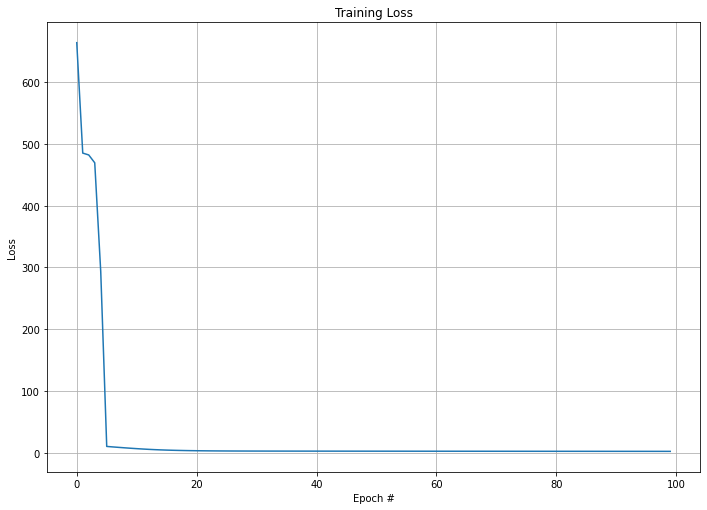

In [11]:
plt.figure(figsize=(11.7,8.27))
plt.plot(range(0, num_epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [35]:
# stochastic gradient descent

def train_sgd(W, X_trains, y_trains, learning_rate, num_epochs):
  n_points = X_trains.shape[0]

  for epoch in np.arange(0, num_epochs):
    
    index = np.random.randint(0, n_points - 1)

    X = X_trains[index:index+1]
      
    y = y_trains[index:index+1]

    h = compute_h(W, X)

    error = h - y

    loss = np.sum(error ** 2)

    losses.append(loss)

    gradient = compute_gradient(error, h, X)

    W += -learning_rate * gradient
    
    if epoch == 0 or (epoch + 1) % 5 == 0:
      print("[LOG] Epoch={}, loss={:.7f}".format(int(epoch + 1), loss))

  return W

In [36]:
num_epochs=100
learning_rate=0.01

W = np.random.randn(X.shape[1], 1)
losses = []

W=train_sgd(W,trainX, trainY, learning_rate, num_epochs)

[LOG] Epoch=1, loss=0.0259345
[LOG] Epoch=5, loss=0.0002023
[LOG] Epoch=10, loss=0.0000000
[LOG] Epoch=15, loss=0.0000000
[LOG] Epoch=20, loss=0.0000000
[LOG] Epoch=25, loss=0.0000000
[LOG] Epoch=30, loss=0.0000020
[LOG] Epoch=35, loss=0.0196904
[LOG] Epoch=40, loss=0.0000000
[LOG] Epoch=45, loss=0.1228374
[LOG] Epoch=50, loss=0.0005592
[LOG] Epoch=55, loss=0.0000000
[LOG] Epoch=60, loss=0.0004102
[LOG] Epoch=65, loss=0.0000000
[LOG] Epoch=70, loss=0.0033610
[LOG] Epoch=75, loss=0.0039241
[LOG] Epoch=80, loss=0.0000000
[LOG] Epoch=85, loss=0.0000000
[LOG] Epoch=90, loss=0.0000000
[LOG] Epoch=95, loss=0.0000000
[LOG] Epoch=100, loss=0.1780380


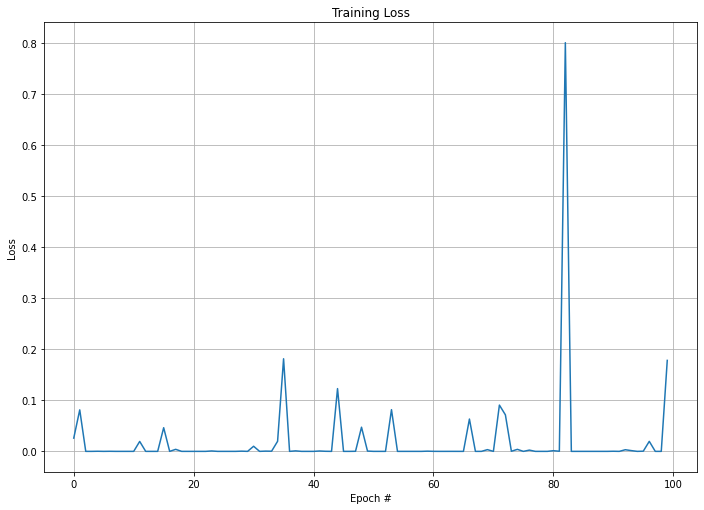

In [37]:
plt.figure(figsize=(11.7,8.27))
plt.plot(range(0, num_epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [44]:
# mini-batch
batch_size = 10

def train_minibatch_gd(W, X_trains, y_trains, learning_rate, num_epochs):
  total_samples = X_trains.shape[0]

  for epoch in np.arange(0, num_epochs):
    
    random_indices = np.random.permutation(total_samples)
    
    X_random = X[random_indices]
    
    y_random = y_trains[random_indices]

    for sample in range(0, total_samples, batch_size):

      X_batch = X_random[sample: sample + batch_size]

      y_batch = y_random[sample: sample + batch_size]

      h = compute_h(W, X)

      error = h - y

      loss = np.sum(error ** 2)

      gradient = compute_gradient(error, h, X)

      W += -learning_rate * gradient

    losses.append(loss)
    
    if epoch == 0 or (epoch + 1) % 5 == 0:
      print("[LOG] Epoch={}, loss={:.7f}".format(int(epoch + 1), loss))

  return W

In [45]:
num_epochs=100
learning_rate=0.01

W = np.random.randn(X.shape[1], 1)
losses = []

W=train_minibatch_gd(W,trainX, trainY, learning_rate, num_epochs)

[LOG] Epoch=1, loss=1.0625983
[LOG] Epoch=5, loss=0.8706703
[LOG] Epoch=10, loss=0.6220142
[LOG] Epoch=15, loss=0.3635225
[LOG] Epoch=20, loss=0.2164887
[LOG] Epoch=25, loss=0.1534308
[LOG] Epoch=30, loss=0.1245680
[LOG] Epoch=35, loss=0.1088837
[LOG] Epoch=40, loss=0.0987561
[LOG] Epoch=45, loss=0.0913069
[LOG] Epoch=50, loss=0.0853519
[LOG] Epoch=55, loss=0.0803492
[LOG] Epoch=60, loss=0.0760200
[LOG] Epoch=65, loss=0.0722031
[LOG] Epoch=70, loss=0.0687951
[LOG] Epoch=75, loss=0.0657240
[LOG] Epoch=80, loss=0.0629368
[LOG] Epoch=85, loss=0.0603923
[LOG] Epoch=90, loss=0.0580579
[LOG] Epoch=95, loss=0.0559071
[LOG] Epoch=100, loss=0.0539179


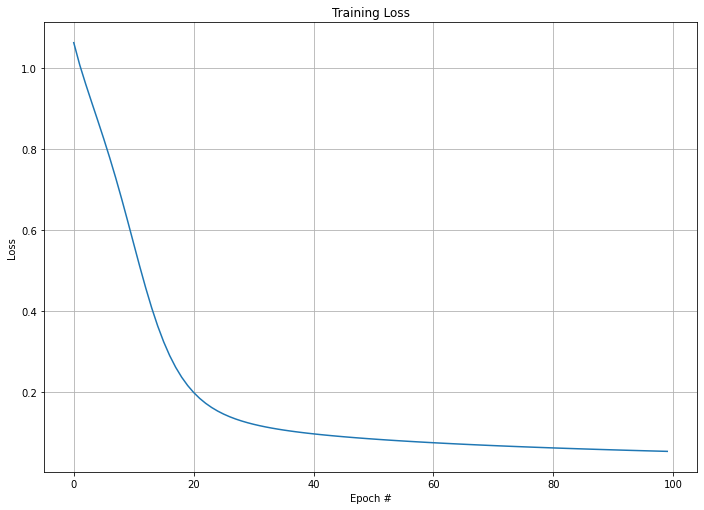

In [46]:
plt.figure(figsize=(11.7,8.27))
plt.plot(range(0, num_epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.grid(True)
plt.show()